In [1]:
from server import server

server.launch()

Interface starting at http://127.0.0.1:8521


RuntimeError: This event loop is already running

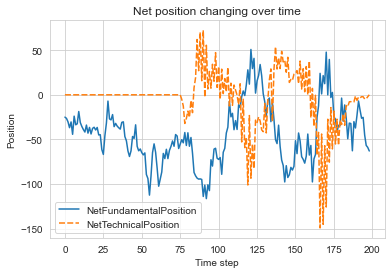

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
df = server.model.datacollector.get_model_vars_dataframe()
df_position = df[['NetFundamentalPosition','NetTechnicalPosition']]
sns.lineplot(data=df_position)
plt.xlabel('Time step')
plt.ylabel('Position')
plt.title('Net position changing over time')
plt.show()

In [1]:
from mesa.batchrunner import FixedBatchRunner
from model import HeterogeneityInArtificialMarket
from model import get_market_order, get_market_price, get_market_value, get_fundamental_position, get_technical_position

simulation_batch = FixedBatchRunner(
    model_cls=HeterogeneityInArtificialMarket,
    model_reporters={
        "Price": get_market_price,
        "FundamentalValue": get_market_value,
        "Order": get_market_order,
        "NetFundamentalPosition": get_fundamental_position,
        "NetTechnicalPosition": get_technical_position
    },
    parameters_list={
            "initial_fundamentalist": 25,
            "initial_technical": 25,
            "initial_mimetic": 25,
            "initial_noise": 25,
            "simulation_period": 1,
            "network_type": "small world"
    },
) 
model = HeterogeneityInArtificialMarket()
simulation_batch.run_model(model)